# Intercomparison Campaigns - Reconstruct Graphics of Beelitz' Intercomparison Campaign 1958

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to demonstrate the usability of data from intercomparison campaigns.

    Author: U. Voggenberger
    Date: 09.2020
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2020

In [1]:
import os, sys
euapath = os.getcwd()+'/../cds-backend/code/'
sys.path.append(euapath)
try:
    import cds_eua3 as eua
except:
    print('could not import eua')
    print('please download https://github.com/MBlaschek/CEUAS/blob/master/CEUAS/public/cds-backend/code/cds_eua3.py and save in ', euapath)
    print('or get the whole repository from https://github.com/MBlaschek/CEUAS')

In [2]:
import pandas
import numpy as np
import datetime
import glob
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import cdsapi, zipfile, os, time, sys

# Please note: Server URL will be omitted, once published
c = cdsapi.Client(url='https://sis-dev.climate.copernicus.eu/api/v2')
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['figure.figsize'] = (10,10)
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

---

In [4]:
# requesting and downloading the data:
t0 = time.time()
# Start Request
r = c.retrieve('insitu-comprehensive-upper-air-observation-network',
               {
                   'variable': ["air_temperature"],
                   # WILDCARD vor all COMP 04 files, if some statids are double, they get filtered:
                   'statid': ['0-20100-0-004*'],
                   'optional': ['sonde_type',],
                   'period': '19000101/20201231',
                   'format': 'csv'                   
               })

if True:
    # Start Download
    r.download(target='download.zip')
    # Check file size
    assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
    # Unzip the Data Stream
    z = zipfile.ZipFile('download.zip')
    print("Unzipping retrieved files: to ./exampla_data/2")
    print(z.namelist())
    z.extractall(path='./example_data/2')
    z.close()
    os.remove('download.zip')
    print("Time elapsed: ", time.time()-t0, "s")

2021-09-20 09:54:47,455 INFO Welcome to the CDS
2021-09-20 09:54:47,456 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-09-20 09:54:47,575 INFO Request is completed
2021-09-20 09:54:47,577 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1632124149.5705166-1248-6-79524542-8ed9-4c77-8afa-8681e5aaa0ec.zip to download.zip (196.5K)
2021-09-20 09:54:47,723 INFO Download rate 1.3M/s


Unzipping retrieved files: to ./exampla_data/2
['temperature.csv']
Time elapsed:  0.41681766510009766 s


In [5]:
data = pandas.read_csv('example_data/2/temperature.csv', index_col=0)
data.report_id.drop_duplicates()

obs_id
0        0-20100-0-00401-000
58       0-20100-0-00401-016
136      0-20100-0-00401-024
199      0-20100-0-00401-028
271      0-20100-0-00401-029
                ...         
15661    0-20100-0-00407-050
15721    0-20100-0-00407-051
15780    0-20100-0-00407-052
15811    0-20100-0-00407-054
15871    0-20100-0-00407-055
Name: report_id, Length: 273, dtype: object

In [6]:
data

,lat,lon,obs,plev,report_id,sonde_type,ta,time,trajectory_label,ta_units,plev_units,statindex
obs_id,,,,,,,,,,,,
0,46.812,6.942,0,1700.0,0-20100-0-00401-000,BBI,229.05,1956-05-27 09:51:00,nnnnnnnnnnnnnnnnnnn,K,Pa,0
1,46.812,6.942,0,1850.0,0-20100-0-00401-000,BBI,227.75,1956-05-27 09:50:00,nnnnnnnnnnnnnnnnnnn,K,Pa,0
2,46.812,6.942,0,1950.0,0-20100-0-00401-000,BBI,226.85,1956-05-27 09:49:00,nnnnnnnnnnnnnnnnnnn,K,Pa,0
3,46.812,6.942,0,2100.0,0-20100-0-00401-000,BBI,225.85,1956-05-27 09:48:00,nnnnnnnnnnnnnnnnnnn,K,Pa,0
4,46.812,6.942,0,2250.0,0-20100-0-00401-000,BBI,224.75,1956-05-27 09:47:00,nnnnnnnnnnnnnnnnnnn,K,Pa,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15919,46.812,6.942,0,85000.0,0-20100-0-00407-055,"FM_,FM5",278.45,1956-06-14 23:05:00,nnnnnnnnnnnnnnnnnnn,K,Pa,13
15920,46.812,6.942,0,87800.0,0-20100-0-00407-055,"FM_,FM5",279.95,1956-06-14 23:04:00,nnnnnnnnnnnnnnnnnnn,K,Pa,13
15921,46.812,6.942,0,91100.0,0-20100-0-00407-055,"FM_,FM5",281.05,1956-06-14 23:03:00,nnnnnnnnnnnnnnnnnnn,K,Pa,13


In [7]:
data.sonde_type.drop_duplicates()

obs_id
0                 BBI
1053      DL2,DL3,DLR
2285     U4_,U4b,U4B 
3667          IC1,IC2
4573              JM_
5759              DG2
7341              S03
8652          RSS,RSN
9857              BPL
10671     IF1,IF2,IFA
11701             BHP
12548             GKB
13639        VU_, V1R
14780        FM_,FM5 
Name: sonde_type, dtype: object

In [8]:
x = data
x.time = pandas.to_datetime(x['time'], format='%Y-%m-%d %H:%M:%S')
type(x.iloc[0].time)

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
x

,lat,lon,obs,plev,report_id,sonde_type,ta,time,trajectory_label,ta_units,plev_units,statindex
obs_id,,,,,,,,,,,,
0,46.812,6.942,0,1700.0,0-20100-0-00401-000,BBI,229.05,1956-05-27 09:51:00,nnnnnnnnnnnnnnnnnnn,K,Pa,0
1,46.812,6.942,0,1850.0,0-20100-0-00401-000,BBI,227.75,1956-05-27 09:50:00,nnnnnnnnnnnnnnnnnnn,K,Pa,0
2,46.812,6.942,0,1950.0,0-20100-0-00401-000,BBI,226.85,1956-05-27 09:49:00,nnnnnnnnnnnnnnnnnnn,K,Pa,0
3,46.812,6.942,0,2100.0,0-20100-0-00401-000,BBI,225.85,1956-05-27 09:48:00,nnnnnnnnnnnnnnnnnnn,K,Pa,0
4,46.812,6.942,0,2250.0,0-20100-0-00401-000,BBI,224.75,1956-05-27 09:47:00,nnnnnnnnnnnnnnnnnnn,K,Pa,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15919,46.812,6.942,0,85000.0,0-20100-0-00407-055,"FM_,FM5",278.45,1956-06-14 23:05:00,nnnnnnnnnnnnnnnnnnn,K,Pa,13
15920,46.812,6.942,0,87800.0,0-20100-0-00407-055,"FM_,FM5",279.95,1956-06-14 23:04:00,nnnnnnnnnnnnnnnnnnn,K,Pa,13
15921,46.812,6.942,0,91100.0,0-20100-0-00407-055,"FM_,FM5",281.05,1956-06-14 23:03:00,nnnnnnnnnnnnnnnnnnn,K,Pa,13


---

In [10]:
# Aufteilen in Tag und Nacht
da = x
da_day = da.iloc[0:0]
da_night = da.iloc[0:0]
for j in range(len(da)):
    if(da.iloc[j].time.hour < 17. and da.iloc[j].time.hour > 6.):
        da_day = da_day.append(da.iloc[j], ignore_index = True)
    else:
        da_night = da_night.append(da.iloc[j], ignore_index = True)

In [11]:
da_day

,lat,lon,obs,plev,report_id,sonde_type,ta,time,trajectory_label,ta_units,plev_units,statindex
0,46.812,6.942,0,1700.0,0-20100-0-00401-000,BBI,229.05,1956-05-27 09:51:00,nnnnnnnnnnnnnnnnnnn,K,Pa,0
1,46.812,6.942,0,1850.0,0-20100-0-00401-000,BBI,227.75,1956-05-27 09:50:00,nnnnnnnnnnnnnnnnnnn,K,Pa,0
2,46.812,6.942,0,1950.0,0-20100-0-00401-000,BBI,226.85,1956-05-27 09:49:00,nnnnnnnnnnnnnnnnnnn,K,Pa,0
3,46.812,6.942,0,2100.0,0-20100-0-00401-000,BBI,225.85,1956-05-27 09:48:00,nnnnnnnnnnnnnnnnnnn,K,Pa,0
4,46.812,6.942,0,2250.0,0-20100-0-00401-000,BBI,224.75,1956-05-27 09:47:00,nnnnnnnnnnnnnnnnnnn,K,Pa,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7548,46.812,6.942,0,82800.0,0-20100-0-00407-051,"FM_,FM5",282.95,1956-06-13 10:13:00,nnnnnnnnnnnnnnnnnnn,K,Pa,13
7549,46.812,6.942,0,86000.0,0-20100-0-00407-051,"FM_,FM5",285.45,1956-06-13 10:12:00,nnnnnnnnnnnnnnnnnnn,K,Pa,13
7550,46.812,6.942,0,89500.0,0-20100-0-00407-051,"FM_,FM5",286.75,1956-06-13 10:11:00,nnnnnnnnnnnnnnnnnnn,K,Pa,13
7551,46.812,6.942,0,96530.0,0-20100-0-00407-051,"FM_,FM5",292.65,1956-06-13 10:05:00,nnnnnnnnnnnnnnnnnnn,K,Pa,13


---

## Allocate the data of each ascent, subtract the corresponding ascent from American sonde, and build means per sondetype.

In [12]:
x = da_day
sond_all = []
temp_all = []

for i in x.report_id.drop_duplicates():
    temp = []
    xx = x[x['report_id'].str[-3:] == i[-3:]] 
    if('U4_,U4b,U4B ' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]
            shorten = 0
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            while True:
                try:
                    f = interp1d(xxx.plev, xxx.ta)
                    temp.append(f(pressure_list))
                    sond_all.append(xxx.iloc[0].sonde_type)
                    break
                except:
                    if shorten > 5:
                        break
                    pressure_list[shorten] = np.nan
                    shorten += 1
    # creates mean of all data series in this ascent.
    mean_temp = np.mean(temp, axis=0)
    for k in temp:
        # difference of ascent and ascent mean.
        temp_all.append((k))

In [13]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

In [14]:
# generating mean values
newmeans = []
for o in means:
    sums = [np.nan]*len(pressure_list)
    for i in range(len(o)):
        for j in range(len(o[i])):
            sums[j] = np.nanmean([sums[j], o[i][j]])
    newmeans.append(np.array(sums))

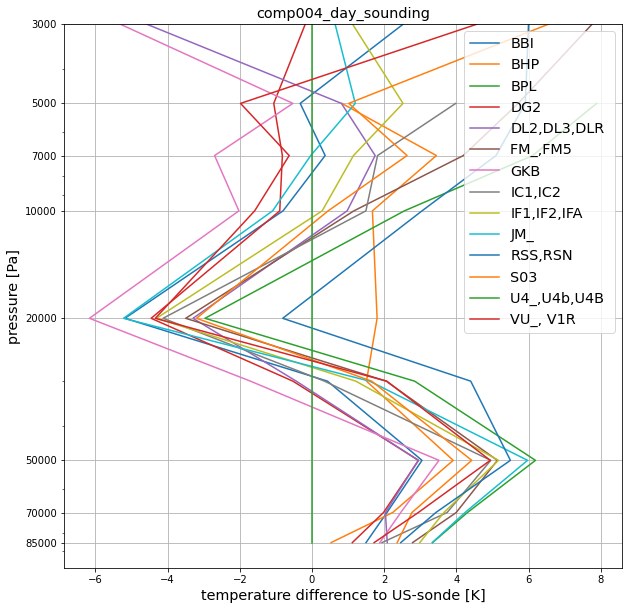

In [15]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]

#     -
for i in range(len(newmeans)):
    # difference of sondtype mean and us sond mean
    ax1.semilogy((np.array(newmeans[i]) - np.array(newmeans[-2])), pressure_list, label = st[i])
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_day_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format, yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()

---

In [16]:
x = da_night
sond_all = []
temp_all = []

for i in x.report_id.drop_duplicates():
    temp = []
    xx = x[x['report_id'].str[-3:] == i[-3:]] 
    if('U4_,U4b,U4B ' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]
            shorten = 0
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            while True:
                try:
                    f = interp1d(xxx.plev, xxx.ta)
                    temp.append(f(pressure_list))
                    sond_all.append(xxx.iloc[0].sonde_type)
                    break
                except:
                    if shorten > 5:
                        break
                    pressure_list[shorten] = np.nan
                    shorten += 1
    # creates mean of all data series in this ascent.
    mean_temp = np.mean(temp, axis=0)
    for k in temp:
        # difference of ascent and ascent mean.
        temp_all.append((k))

In [17]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

In [18]:
# generating mean values
newmeans = []
for o in means:
    sums = [np.nan]*len(pressure_list)
    for i in range(len(o)):
        for j in range(len(o[i])):
            sums[j] = np.nanmean([sums[j], o[i][j]])
    newmeans.append(np.array(sums))

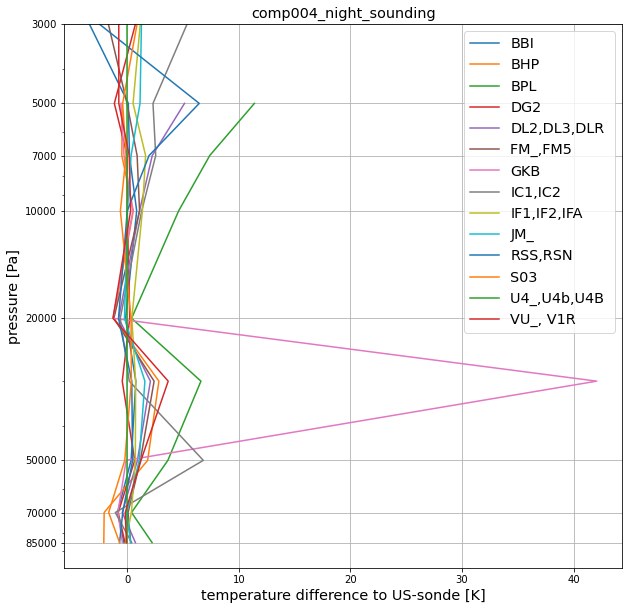

In [19]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]
#     -
for i in range(len(newmeans)):
    # difference of sondtype mean and us sond mean
    ax1.semilogy((np.array(newmeans[i]) - np.array(newmeans[-2])), pressure_list, label = st[i])
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_night_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format, yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()

---

## Calculation the systematic differences of each ascent, subtract the corresponding ascent from American sonde, and build means per sondetype.

In [20]:
x = da_day
sond_all = []
temp_all = []

for i in x.report_id.drop_duplicates():
    temp = []
    xx = x[x['report_id'].str[-3:] == i[-3:]] 
    if('U4_,U4b,U4B ' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]
            shorten = 0
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            while True:
                try:
                    f = interp1d(xxx.plev, xxx.ta)
                    temp.append(f(pressure_list))
                    sond_all.append(xxx.iloc[0].sonde_type)
                    break
                except:
                    if shorten > 5:
                        break
                    pressure_list[shorten] = np.nan
                    shorten += 1
    # creates mean of all data series in this ascent.
    mean_temp = np.mean(temp, axis=0)
    for k in temp:
        # difference of ascent and ascent mean.
        temp_all.append((k-mean_temp))

In [21]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

In [22]:
# generating mean values
newmeans = []
for o in means:
    sums = [np.nan]*len(pressure_list)
    for i in range(len(o)):
        for j in range(len(o[i])):
            sums[j] = np.nanmean([sums[j], o[i][j]])
    newmeans.append(np.array(sums))

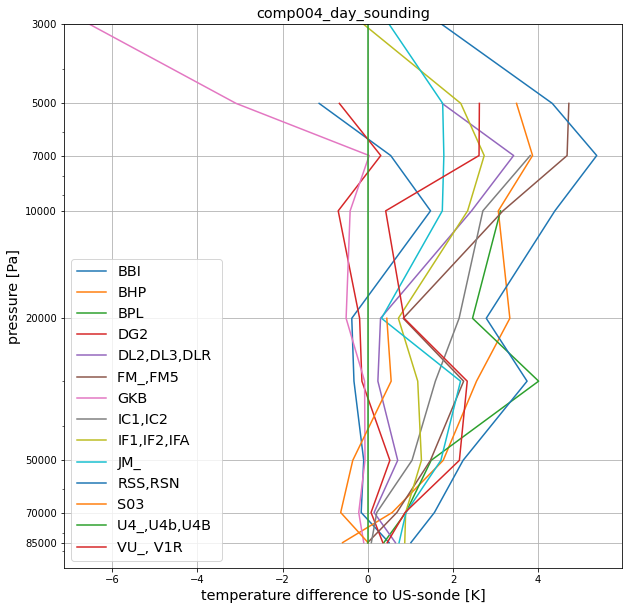

In [23]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]

#     -
for i in range(len(newmeans)):
    # difference of sondtype mean and us sond mean
    ax1.semilogy((np.array(newmeans[i]) - np.array(newmeans[-2])), pressure_list, label = st[i])
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_day_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format, yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()

---

In [24]:
x = da_night
sond_all = []
temp_all = []

for i in x.report_id.drop_duplicates():
    temp = []
    xx = x[x['report_id'].str[-3:] == i[-3:]] 
    if('U4_,U4b,U4B ' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]
            shorten = 0
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            while True:
                try:
                    f = interp1d(xxx.plev, xxx.ta)
                    temp.append(f(pressure_list))
                    sond_all.append(xxx.iloc[0].sonde_type)
                    break
                except:
                    if shorten > 5:
                        break
                    pressure_list[shorten] = np.nan
                    shorten += 1
    # creates mean of all data series in this ascent.
    mean_temp = np.mean(temp, axis=0)
    for k in temp:
        # difference of ascent and ascent mean.
        temp_all.append((k-mean_temp))

In [25]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

In [26]:
# generating mean values
newmeans = []
for o in means:
    sums = [np.nan]*len(pressure_list)
    for i in range(len(o)):
        for j in range(len(o[i])):
            sums[j] = np.nanmean([sums[j], o[i][j]])
    newmeans.append(np.array(sums))

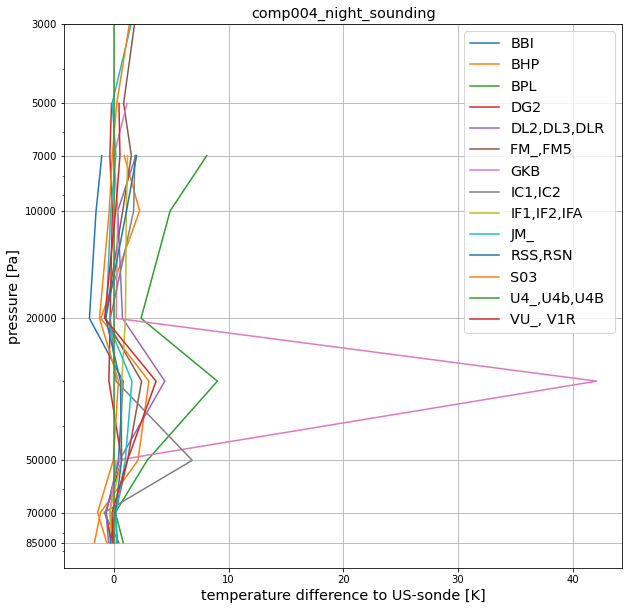

In [27]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]

#     -
for i in range(len(newmeans)):
    # difference of sondtype mean and us sond mean
    ax1.semilogy((newmeans[i] - newmeans[-2]), pressure_list, label = st[i])
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_night_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format, yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()